**Jupyter: w_ipa**

This is an example jupyter/ipython notebook for WESTPA simulations, designed for interactive analysis using w_ipa.  Use this as a template for further browser-based interactive analysis of simulations.

You'll want to start each notebook session with the following:

```
    import w_ipython
    w = w_ipython.WIPI()
    w.main()
```

The w object can then be used for analysis.  Schemes can be listed and changed with

```
    w.list_schemes
    w.scheme = SCHEME_NUMBER/NAME
```

Run help(w), or w.introduction for more details.

Happy analyzing!

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf)
import w_ipa
w = w_ipa.WIPI()
# At startup, it will load or run the analysis schemes specified in the configuration file (typically west.cfg)
w.main()
w.interface = 'matplotlib'


Welcome to w_ipa (WESTPA Interactive Python Analysis) v. 1.0B!
Run w.introduction for a more thorough introduction, or w.help to see a list of options.
Running analysis & loading files.

Complete!
Setting iteration to iter 200.


In [2]:
total_iteration = 200

it = [0.0 for i in range(total_iteration)]

flux = 0.0
flux_array = []
sink = 26.0

lifetime = 0.0
force_eval = 0.0

count_forward = 0
count_backward = 0
for i in range(total_iteration):
    w.iteration = i+1
    l = w.current.pcoord
    wts = w.current.weights
    tau = 11
    force_eval += (tau-1)*w.current.walkers*0.2
    print 'total simulation time = ', force_eval, 'ps'
    for j in range(len(l)):
        #print j
            
        if l[j][0] > sink and l[j][tau-1] <= sink:
            it[i] += wts[j]
            #print wts[j]
            count_backward += 1
            for k in range(tau):
                #print k
                if l[j][k] > sink and l[j][k+1] <= sink:
                    flux += wts[j]
                    lifetime += wts[j]*(i*(tau-1)+k)
                    break
            #break
    print flux
    flux_array.append(flux)
flux = flux/float(total_iteration*(tau-1))    
print "MFPT = ", 1./flux     
print "lifetime = ", lifetime/sum(it)
print sum(it)
print sum(it)/flux

f1 = open('milestone-data.dat','w')
print >>f1, "#MFPT  #MFPT_back  #lifetime  #forward probability  #backward probability #forward count #backward count"
print >>f1, 1./flux, 0.0, lifetime, 0.0, sum(it),  count_forward, count_backward
f1.close()

Setting iteration to iter 1.
total simulation time =  10.0 ps
0.0
Setting iteration to iter 2.
total simulation time =  30.0 ps
0.08
Setting iteration to iter 3.
total simulation time =  80.0 ps
0.16
Setting iteration to iter 4.
total simulation time =  140.0 ps
0.208
Setting iteration to iter 5.
total simulation time =  200.0 ps
0.275933333333
Setting iteration to iter 6.
total simulation time =  260.0 ps
0.356355555556
Setting iteration to iter 7.
total simulation time =  310.0 ps
0.395059259259
Setting iteration to iter 8.
total simulation time =  370.0 ps
0.406262962963
Setting iteration to iter 9.
total simulation time =  430.0 ps
0.420012962963
Setting iteration to iter 10.
total simulation time =  490.0 ps
0.446283796296
Setting iteration to iter 11.
total simulation time =  540.0 ps
0.46130462963
Setting iteration to iter 12.
total simulation time =  580.0 ps
0.46130462963
Setting iteration to iter 13.
total simulation time =  630.0 ps
0.505350578704
Setting iteration to iter 1

0.644417600263
Setting iteration to iter 107.
total simulation time =  6080.0 ps
0.644417600263
Setting iteration to iter 108.
total simulation time =  6140.0 ps
0.644417600263
Setting iteration to iter 109.
total simulation time =  6200.0 ps
0.644417600263
Setting iteration to iter 110.
total simulation time =  6260.0 ps
0.644417600263
Setting iteration to iter 111.
total simulation time =  6320.0 ps
0.644417600263
Setting iteration to iter 112.
total simulation time =  6380.0 ps
0.644417600263
Setting iteration to iter 113.
total simulation time =  6440.0 ps
0.644417600263
Setting iteration to iter 114.
total simulation time =  6500.0 ps
0.644417600263
Setting iteration to iter 115.
total simulation time =  6560.0 ps
0.644417600263
Setting iteration to iter 116.
total simulation time =  6620.0 ps
0.644417600263
Setting iteration to iter 117.
total simulation time =  6680.0 ps
0.644417600263
Setting iteration to iter 118.
total simulation time =  6740.0 ps
0.644417600263
Setting itera

In [3]:
print it
f1 = open('FPTD.dat','w')

for i in range(len(it)):
    print >>f1, i*tau, it[i]
    
f1.close()

[0.0, 0.080000000000000002, 0.080000000000000002, 0.048000000000000008, 0.067933333333333346, 0.080422222222222228, 0.038703703703703705, 0.011203703703703705, 0.013750000000000002, 0.026270833333333334, 0.015020833333333334, 0.0, 0.044045949074074074, 0.031285594135802473, 0.019163125, 0.022168950617283953, 0.016922554012345679, 0.02901956539351852, 0.00073649569187242794, 0.0043284788049768519, 0.0012751536779835391, 0.0012650818892532578, 0.0020203115553197874, 0.00015029708236882717, 0.0, 0.00033614243636938447, 0.0001550818733121142, 0.00010019805491255145, 0.0, 4.5715815031531026e-05, 7.7033438575642687e-05, 8.0419036972687014e-05, 6.5218654181306251e-06, 4.0138899488864651e-06, 1.3674253447621692e-06, 8.7254585968415373e-07, 3.8328832852270997e-07, 5.2361218292980489e-08, 1.3637063043351707e-08, 0.0, 0.0, 6.6362786983069922e-09, 0.0, 1.3637063043351708e-09, 0.0, 7.2723914295806235e-10, 1.0908587144370934e-10, 0.0, 8.4179401502171033e-11, 3.4652007628271459e-10, 3.703696760482482

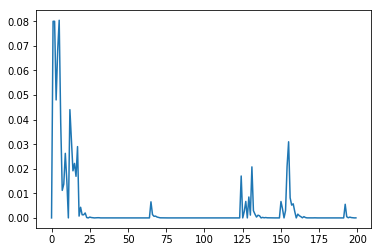

In [4]:
plt.plot(it)

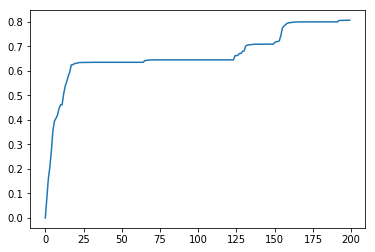

In [5]:
plt.plot(flux_array)
f1 = open('flux.dat','w')
print >>f1, '#time #flux'
for i in range(len(it)):
    print >>f1, i*(tau-1), flux_array[i]
    
f1.close()